In [1]:
# 목표
# XOR 문제를 코딩했을 때에는 가중치를 미리 알고 접근했었다.
# 하지만 가중치를 모른 상태에서 y값만 알때에는 히든층을 역으로 어떻게 계산할까?

# 정방향일 때는 가중치를 직접 줬으나, 오차 역전파를 사용하면 가중치와 바이어스를 몰라도 된다.
# 이미 배웠던 경사 하강법의 확장이기도 하다.

In [2]:
# 오차 역전파(back propagation)의 역사

# 정방향으로 로직을 전개해서 답을 확인했으나, 틀린 경우, 오류를 수정해서 다시 적합한 공식을 생성해야 한다.
# 오류에 대한 영향도를 확인하면, 오류도를 줄이는 방향으로 공식을 수정하고, 다시 정방향으로 답을 전개한다.
# 많은 학습을 통해 공식을 수정한 프로그램은 실제 운영 데이터에 적용하여 사용한다.
# 물론 오류에 대한 영향도를 확인하는 것은 이전의 경사하강법도 하는 프로세스이다. 


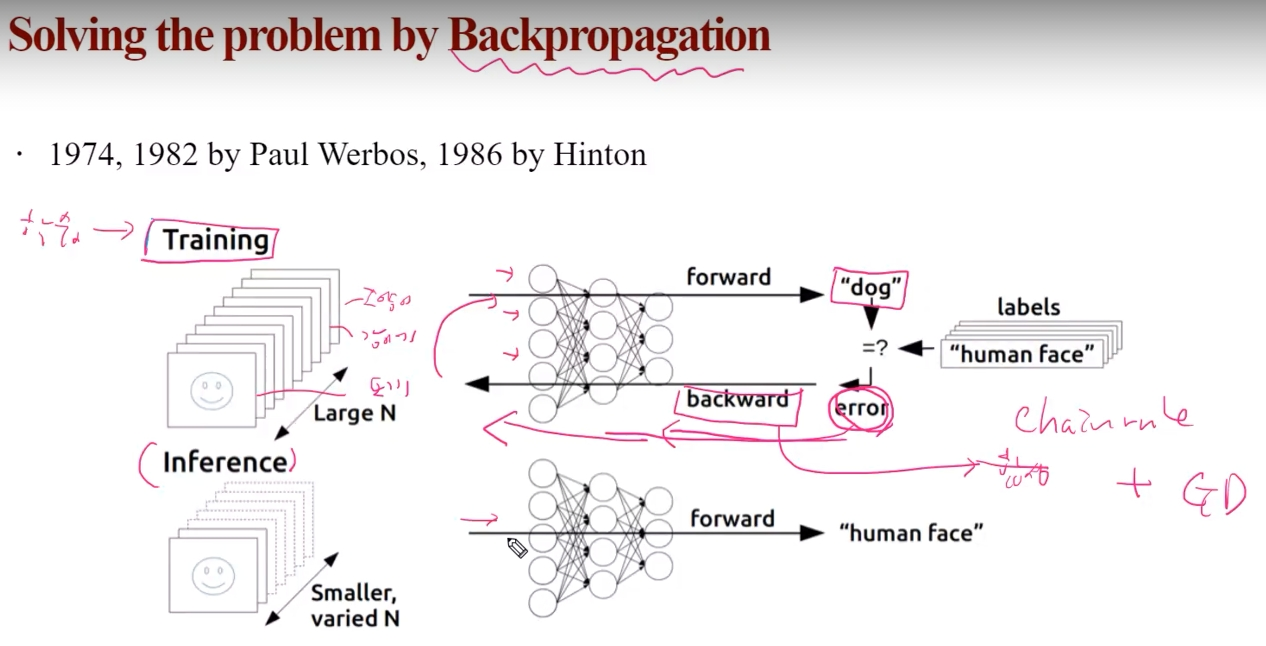

In [3]:

# 기존 방법의 문제
# Loss를 Z로 미분하면 해당 layer에 대하여 그 오류에 대한 영향도를 확인할 수 있다.
    # Loss 함수를 Z로 미분할 때, Z는 합성함수이기 때문에 실제로 미분이 안된다.
    # 그 문제를 해결하기 위해서 chain rule을 사용하여 해결한다.

# 오차 역전파의 시작 
# 그런데 그 과장에서 Loss를 미분할 때 문제가 생겼기 때문에 그걸 해결하기 위해서 chain rule을 도입했다.
# 즉 오차 역전파의 의의는 "프로그램 자체가 오류에 대한 영향력을 확인할 때 쓰이는, [Loss를 미분하는 방법인 chain rule]"이다.


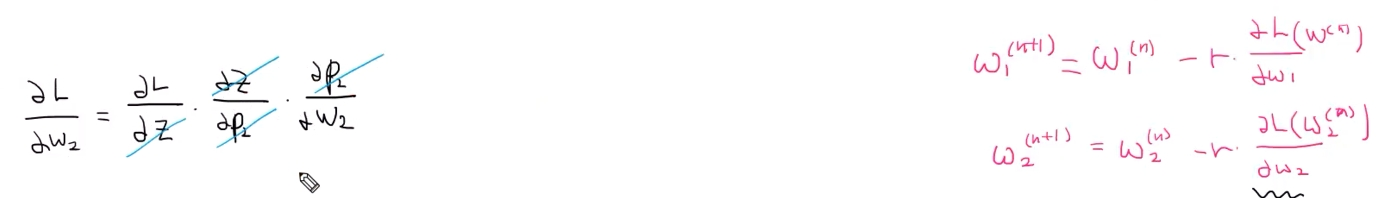

In [4]:
# 질문 1 : 그냥 경사 하강법인 것 같은데, 도대체 왜 이것이 오기전에 경사 하강법을 썼으면 된 거 아닌가?
# 답변 1 : 생각해보니 그럴 듯한데, 경사하강법과 오차 역전파가 뭐가 다른지 조사해올것
# 답변 2 : 경사하강법을 사용했었는데, 합성함수 때문에 미분이 안되서 막혔었다. 아예 실질적으로 미분이 안된다고 생각했었다.
#          그런데 chain rule을 사용해서 미분해서 해결했다.
#          그 chain rule을 사용할 때, 역전개처럼 되기 때문에, 이걸 오차 역전파라고 이름을 지었다.

# 질문 2 : 멀티 퍼셉트론은 feature가 늘어날 수록 연립 방정식 연산이 많아서 실질적으로 힘들다고 포기했으면서, 
#          어째서 정방향으로 연산하면서, 역연산까지 하면서, 오차 역전파로 연산이 줄어서 해결이 됬다고 하는건가?
#          정방향에서 전개를 할 때에는 전혀 다른 점이 없는데, feature가 늘어날 수록 연산이 많아지는 것은 마찬가지 아닌가?
# 답변   : 정확하게 얼마의 연산이 걸리는 지, 조사를 해봐야 할 것 같다. 막연히 연산이 많다. 적다를 평가를 하는 코드를 짜봐야 할 것 같다.
# 답변   : 기존에도 오류를 수정하기 위해서 다시 오류에 대한 영향도를 조사해야 했다. 
#        : 그런데 Loss를 Z로 미분할 때, 각 feature마다 일일이 다 계산하려면 실질적으로 어려웠다.(심지어 2~3개 조차...) 
#            Marvin Minsky조차 이건 힘들다고 할 정도였다.
#          역전파의 핵심은 chain rule이며, 이 chain rule이 대폭적인 연산을 줄여줬다. 
# 추가 보충 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ehdrndd&logNo=221404124238
# 확인해보기 : https://www.youtube.com/watch?v=573EZkzfnZ0&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=28


In [5]:
# 실습
# XOR 문제를 코딩했을 때에는 가중치를 미리 알고 접근했었다.
# 하지만 가중치를 모른 상태에서 y값만 알때에는 히든층을 역으로 어떻게 계산할까?

# 정방향일 때는 가중치를 직접 줬으나, 오차 역전파를 사용하면 가중치와 바이어스를 몰라도 된다.
# 이미 배웠던 경사 하강법의 확장이기도 하다.
import numpy as np
import random

random.seed(777)

data = [
        [[0, 0], [0]],
        [[0, 1], [1]],
        [[1, 0], [1]],
        [[1, 1], [0]]
]


iterations = 5000   # 학습 횟수
lr = 0.1            # 학습률
mo = 0.4            # 모멘텀 계수

# 활성화 함수1 : 시그모이드 함수
def sigmoid(x, derivative = False):
    if (derivative == True) :
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

# 활성화 함수2 : 하이퍼볼릭 탄젠트 함수
def tanh(x, derivative = False):
    if (derivative == True):
        return 1 - x ** 2
    return np.tanh(x)

# 가중치 배열 만드는 함수
def makeMatrix(i, j, fill = 0.0):
    mat = []
    for i in range(i):
        mat.append([fill] * j)
    return mat


In [8]:

class NeuralNetwork:

    # 초기값 지정
    def __init__(self, num_x, num_yh, num_yo, bias = 1):

        #입력 값 (num_x) 은닉층의 초기값(num_yh), 출력층의 초기값(num_yo), 바이어스
        self.num_x = num_x + bias # 바이어스는 1로 설정
        self.num_yh = num_yh
        self.num_yo = num_yo

        # 활성화 함수 초기값
        self.activation_input = [1.0] * self.num_x
        self.activation_hidden = [1.0] * self.num_yh
        self.activation_out = [1.0] * self.num_yo

        # 가중치 입력 초기값
        self.weight_in = makeMatrix(self.num_x, self.num_yh)
        for i in range(self.num_x):
            for j in range(self.num_yh):
                self.weight_in[i][j] = random.random()

        # 가중치 출력 초기값
        self.weight_out = makeMatrix(self.num_yh, self.num_yo)
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                self.weight_out[j][k] = random.random()

        # 모멘텀 SGD를 위한 이전 가중치 초기값
        self.gradient_in = makeMatrix(self.num_x, self.num_yh)
        self.gradient_out = makeMatrix(self.num_yh, self.num_yo)

    # 업데이트 함수
    def update(self, inputs):

        # 입력층의 활성화 함수 (num_x -1인 이유는?)
        for i in range(self.num_x -1):
            self.activation_input[i] = inputs[i]

        # 은닉층의 활성화 함수
        for j in range(self.num_yh):
            sum = 0.0
            for i in range(self.num_x):
                sum = sum + self.activation_input[i] * self.weight_in[i][j]

            # 시그모이드와 tanh 중에서 활성화 함수 선택
            self.activation_hidden[j] = tanh(sum, False)

        # 출력층의 활성화 함수
        for k in range(self.num_yo):
            sum = 0.0
            for j in range(self.num_yh):
                sum = sum + self.activation_hidden[j] * self.weight_out[j][k]

            self.activation_out[k] = tanh(sum, False)
        return self.activation_out[:]

    # 역전파 실행
    def backPropagate(self, targets):

        # 델타 출력 계산
        output_deltas = [0.0] * self.num_yo
        for k in range(self.num_yo):
            error = targets[k] - self.activation_out[k]
            # 시그모이드와 tanh 중에서 활성화 함수 선택 미분 적용
            output_deltas[k] = tanh(self.activation_out[k], True) * error
        
        #은닉 노드의 오차 함수
        hidden_deltas = [0.0] * self.num_yh

        for j in range(self.num_yh):
            error = 0.0
            for k in range(self.num_yo):
                error = error + output_deltas[k] * self.weight_out[j][k]

            # 시그모이드와 tanh 중에서 활성화 함수 선택 미분 적용
            hidden_deltas[j] = tanh(self.activation_hidden[j], True) * error

        # 출력 가중치 업데이트
        for j in range(self.num_yh):
            for k in range(self.num_yo):
                gradient = output_deltas[k] * self.activation_hidden[j]
                v = mo * self.gradient_out[j][k] - lr * gradient
                self.weight_out[j][k] += v
                self.gradient_out[j][k] = gradient

        # 입력 가중치 업데이트
        for i in range(self.num_x):
            for j in range(self.num_yh):
                gradient = hidden_deltas[j] * self.activation_input[i]
                v = mo * self.gradient_in[i][j] - lr * gradient
                self.weight_in[i][j] += v
                self.gradient_in[i][j] = gradient

        # 오차 계산(최소 제곱법)
        error = 0.0
        for k in range(len(targets)):
            error = error + 0.5 * (targets[k] - self.activation_out[k]) ** 2
        return error

    def train(self, patterns):
        for i in range(iterations):
            error = 0.0

            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.update(inputs)
                error = error + self.backPropagate(targets)
            if i % 500 == 0:
                print('error: %-.5f' % error)

    def result(self, patterns):
        for p in patterns:
            print('input: %s, Predict: %s' % (p[0], self.update(p[0])))

if __name__ == '__main__':
    # 두 개의 입력 값, 두 개의 레이어, 하나의 출력 값을 갖도록 설정
    n = NeuralNetwork(2, 2, 1)

    # 학습진행
    n.train(data)

    # 결과값 출력
    n.result(data)

error: 0.53035
error: 0.00245
error: 0.00085
error: 0.00050
error: 0.00035
error: 0.00027
error: 0.00022
error: 0.00018
error: 0.00016
error: 0.00014
input: [0, 0], Predict: [0.0006092930383968345]
input: [0, 1], Predict: [0.9889868278175443]
input: [1, 0], Predict: [0.9890205717573967]
input: [1, 1], Predict: [0.002143381623702393]
